In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_curve, roc_auc_score

sns.set_style("whitegrid")

Read in the dataset, whcih is the well-known Pima Indians Diabetes dataset

In [2]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Break out the Outcome column, which is the target variable.

In [4]:
outcome = diabetes['Outcome']
diabetes.drop(columns='Outcome', inplace=True)

Split the data into training and test sets, standardize predictors since we're using regularization

In [5]:
X_train, X_test, y_train, y_test = train_test_split(diabetes, outcome, test_size=0.2)

std_X_train = StandardScaler().fit_transform(X_train)
std_X_test = StandardScaler().fit_transform(X_test)

Now fit a logistic regression model on the training data

In [6]:
model = LogisticRegressionCV(Cs=15)

model.fit(std_X_train, y_train)
print("Model Training Summary")
print("======================")
print(f"Number of Iterations: {model.n_iter_}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Chosen C hyperparameter: {model.C_}")
print(f"In-sample Accuracy: {model.score(std_X_train, y_train)}")

Model Training Summary
Number of Iterations: [[[8 8 9 8 8 9 9 8 7 6 4 3 1 1 1]
  [7 4 9 8 8 9 8 8 7 6 4 3 1 1 1]
  [8 8 9 8 8 9 9 8 7 5 4 3 1 1 1]
  [8 4 9 8 8 9 9 8 8 6 5 3 1 1 1]
  [8 7 9 8 8 9 9 8 7 5 4 3 1 1 1]]]
Intercept: [-0.74241216]
Coefficients: [[ 0.2016776   0.67582179 -0.10641732  0.00886398  0.02270072  0.3823331
   0.22360149  0.18879263]]
Chosen C hyperparameter: [0.01930698]
In-sample Accuracy: 0.7703583061889251


Assess performance on test data

Confusion Matrix
 [[94  7]
 [26 27]]
Out-of-sample accuracy: 0.7857142857142857
Out-of-sample Matthews Correlation Coefficient: 0.5041346902146397
Out-of-sample AUC: 0.8266392677003549


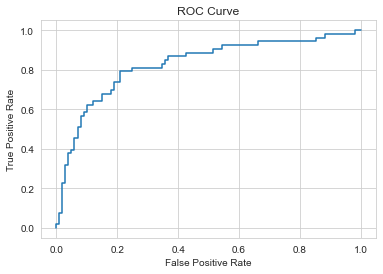

In [7]:
y_pred = model.predict(std_X_test)
pred_diabetes_prob = model.predict_proba(std_X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, pred_diabetes_prob)

print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print(f"Out-of-sample accuracy: {model.score(std_X_test, y_test)}")
print(f"Out-of-sample Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred)}")
print(f"Out-of-sample AUC: {roc_auc_score(y_test, pred_diabetes_prob)}")

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()